# 📚 Cours de NLP avancé - Notebook pratique

## 🚀 Introduction au NLP
- NLP : Traitement automatique du langage naturel, branche de l'IA.
- Objectif : comprendre, interpréter, générer le langage humain.

## 🛠️ Prétraitement de Texte

### 1. Tokenisation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize

texte = "Le NLP est passionnant. C'est une branche importante de l'IA !"
tokens_mots = word_tokenize(texte, language='french')
tokens_phrases = sent_tokenize(texte, language='french')

print("Tokens (mots):", tokens_mots)
print("Tokens (phrases):", tokens_phrases)

Tokens (mots): ['Le', 'NLP', 'est', 'passionnant', '.', "C'est", 'une', 'branche', 'importante', 'de', "l'IA", '!']
Tokens (phrases): ['Le NLP est passionnant.', "C'est une branche importante de l'IA !"]


### 2. Normalisation

In [4]:
# Conversion du texte en minuscules pour réduire la variabilité.

texte = "Le NLP est INCROYABLEMENT Utile !"
texte_normalise = texte.lower()

print("Texte normalisé :", texte_normalise)


Texte normalisé : le nlp est incroyablement utile !


### 3. Suppression des stopwords

In [5]:
# Élimination des mots courants peu informatifs.
from nltk.corpus import stopwords

texte = "Le NLP est très intéressant pour l'analyse de texte"
stop_words = set(stopwords.words('french'))

tokens = word_tokenize(texte, language='french')
filtered_tokens = [w for w in tokens if w.lower() not in stop_words]

print("Tokens filtrés :", filtered_tokens)

Tokens filtrés : ['NLP', 'très', 'intéressant', "l'analyse", 'texte']


### 4. Lemmatisation

In [6]:
# Installer le modèle français de spaCy
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 47.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
# Transformer chaque mot en sa forme racine linguistique.
import spacy

nlp = spacy.load('fr_core_news_sm')
texte = "Les étudiants apprennent l'utilisation des modèles NLP en ingénierie"
doc = nlp(texte)

lemmes = [token.lemma_ for token in doc]

print("Lemmes obtenus :", lemmes)

Lemmes obtenus : ['le', 'étudiant', 'apprendre', 'le', 'utilisation', 'de', 'modèle', 'NLP', 'en', 'ingénierie']


In [ ]:
texte = "Les étudiants apprennent l'utilisation des modèles NLP en ingénierie."
doc = nlp(texte)

for token in doc:
    print(f"Mot: {token.text} - Lemme: {token.lemma_} - POS: {token.pos_}")


Mot: Les - Lemme: le - POS: DET
Mot: étudiants - Lemme: étudiant - POS: NOUN
Mot: apprennent - Lemme: apprendre - POS: VERB
Mot: l' - Lemme: le - POS: DET
Mot: utilisation - Lemme: utilisation - POS: NOUN
Mot: des - Lemme: de - POS: ADP
Mot: modèles - Lemme: modèle - POS: NOUN
Mot: NLP - Lemme: NLP - POS: PROPN
Mot: en - Lemme: en - POS: ADP
Mot: ingénierie - Lemme: ingénierie - POS: NOUN
Mot: . - Lemme: . - POS: PUNCT


### 🎯 Challenge : Construire son pipeline complet

In [ ]:
def preprocessing_pipeline(texte):
    texte = texte.lower()
    tokens = word_tokenize(texte, language='french')
    tokens_filtrés = [mot for mot in tokens if mot not in stop_words and mot.isalpha()]
    doc = nlp(" ".join(tokens_filtrés))
    lemmes = [token.lemma_ for token in doc]
    return lemmes

# Test
resultat = preprocessing_pipeline("Les étudiants M2 Ingénieur découvrent les bases du NLP interactif !")
print("Résultat du pipeline complet :", resultat)


Résultat du pipeline complet : ['étudiant', 'ingénieur', 'découvrir', 'base', 'nlp', 'interactif']


## 📐 Représentation vectorielle : Exemple One Hot Encoding

In [ ]:
# Classification avec One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Corpus simple
corpus = [
    "je mange une pomme",         # fruit
    "je mange une poire",         # fruit
    "il conduit une voiture",     # autre
    "tu répares une voiture"      # autre
]

# Labels associés
labels = ["fruit", "fruit", "autre", "autre"]

# Tokenisation
tokens = [sentence.split() for sentence in corpus]

# Construction du vocabulaire
vocab = sorted(set(word for phrase in tokens for word in phrase))

# Création du DataFrame avec chaque mot de chaque phrase
flattened = [(i, word) for i, phrase in enumerate(tokens) for word in phrase]
df = pd.DataFrame(flattened, columns=["phrase_id", "mot"])

# One-hot encoding des mots
encoder = OneHotEncoder(handle_unknown='ignore')
one_hot = encoder.fit_transform(df[["mot"]]).toarray()

# Regrouper par phrase pour obtenir un vecteur par phrase
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(["mot"]))
one_hot_df["phrase_id"] = df["phrase_id"]
vectors = one_hot_df.groupby("phrase_id").sum().astype(int)

# Entraînement du modèle
clf = LogisticRegression()
clf.fit(vectors, labels)

# Test sur de nouvelles phrases
test_phrases = [
    "je mange une banane",     # devrait être fruit
    "elle conduit une moto"    # devrait être autre
]
test_tokens = [s.split() for s in test_phrases]
test_flattened = [(i, word) for i, phrase in enumerate(test_tokens) for word in phrase]
df_test = pd.DataFrame(test_flattened, columns=["phrase_id", "mot"])
test_encoded = encoder.transform(df_test[["mot"]]).toarray()
df_test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(["mot"]))
df_test_encoded["phrase_id"] = df_test["phrase_id"]
X_test = df_test_encoded.groupby("phrase_id").sum().astype(int)

# Prédiction
y_pred = clf.predict(X_test)

# Résultat
for phrase, pred in zip(test_phrases, y_pred):
    print(f"Phrase : '{phrase}' → Prédiction : {pred}")

Phrase : 'je mange une banane' → Prédiction : fruit
Phrase : 'elle conduit une moto' → Prédiction : autre


## 📐 Représentation vectorielle : Exemple Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd

# --------------------------
# 1. Corpus enrichi + lowercased
# --------------------------
avis = [
    "Ce film est génial",
    "J'adore ce film",
    "C'était un excellent film",
    "Ce film est formidable",
    "Je recommande ce film",
    "J'ai adoré ce film",
    "Ce film est nul",
    "Je déteste ce film",
    "C'était un mauvais film",
    "Ce film est une perte de temps",
    "Je ne recommande pas ce film",
    "Ce film est horrible"
]

labels = ["positif"] * 6 + ["négatif"] * 6

# Conversion en minuscules
avis = [a.lower() for a in avis]

# --------------------------
# 2. Split manuel : 8 train / 4 test (2 positifs + 2 négatifs)
# --------------------------
X_train = avis[:8]
y_train = labels[:8]

X_test = avis[8:]
y_test = labels[8:]

# Affichage clair des splits
print("=== Entraînement ===")
for x, y in zip(X_train, y_train):
    print(f"{x} → {y}")
print("\n=== Test ===")
for x, y in zip(X_test, y_test):
    print(f"{x} → {y}")
print("\n")

# --------------------------
# 3. Pipeline : BoW + logistic regression
#     avec n-grammes (1,2)
# --------------------------
pipeline = Pipeline([
    ("vectorizer", CountVectorizer(ngram_range=(1, 2))),  # mots + paires
    ("classifier", LogisticRegression(max_iter=1000))
])

# --------------------------
# 4. Entraînement
# --------------------------
pipeline.fit(X_train, y_train)

# --------------------------
# 5. Prédiction sur test
# --------------------------
SEUIL = 0.6  # <- tu peux changer ici

y_proba = pipeline.predict_proba(X_test)
y_pred = ["positif" if p[1] >= SEUIL else "négatif" for p in y_proba]

print("=== Prédictions sur le test ===")
for a, true, p in zip(X_test, y_test, y_proba):
    print(f"Texte : {a}")
    print(f" → Vrai label : {true}")
    print(f" → Proba négatif : {p[0]:.2f} | Proba positif : {p[1]:.2f}")
    print(f" → Prédiction : {'positif' if p[1] >= 0.5 else 'négatif'}")
    print("—" * 50)

# --------------------------
# 6. Rapport global
# --------------------------
print("\n=== Rapport de classification ===")
print(classification_report(y_test, y_pred, zero_division=0))

# --------------------------
# 7. Test sur nouvelles phrases
# --------------------------
nouveaux_avis = [
    "ce film est incroyable",   # attendu : positif
    "je le recommande fortement",  # attendu : positif
    "ce film est horrible",     # attendu : négatif
    "je ne le recommande pas",  # attendu : négatif
]
nouveaux_avis = [a.lower() for a in nouveaux_avis]

probas_nouvelles = pipeline.predict_proba(nouveaux_avis)
predictions = ["positif" if p[1] >= 0.5 else "négatif" for p in probas_nouvelles]

print("\n=== Test sur nouvelles phrases ===")
for a, p, proba in zip(nouveaux_avis, predictions, probas_nouvelles):
    print(f"{a}")
    print(f" → Proba négatif : {proba[0]:.2f} | Proba positif : {proba[1]:.2f}")
    print(f" → Prédiction : {p}")
    print("—" * 50)

=== Entraînement ===
ce film est génial → positif
j'adore ce film → positif
c'était un excellent film → positif
ce film est formidable → positif
je recommande ce film → positif
j'ai adoré ce film → positif
ce film est nul → négatif
je déteste ce film → négatif

=== Test ===
c'était un mauvais film → négatif
ce film est une perte de temps → négatif
je ne recommande pas ce film → négatif
ce film est horrible → négatif


=== Prédictions sur le test ===
Texte : c'était un mauvais film
 → Vrai label : négatif
 → Proba négatif : 0.14 | Proba positif : 0.86
 → Prédiction : positif
——————————————————————————————————————————————————
Texte : ce film est une perte de temps
 → Vrai label : négatif
 → Proba négatif : 0.26 | Proba positif : 0.74
 → Prédiction : positif
——————————————————————————————————————————————————
Texte : je ne recommande pas ce film
 → Vrai label : négatif
 → Proba négatif : 0.23 | Proba positif : 0.77
 → Prédiction : positif
——————————————————————————————————————————————————


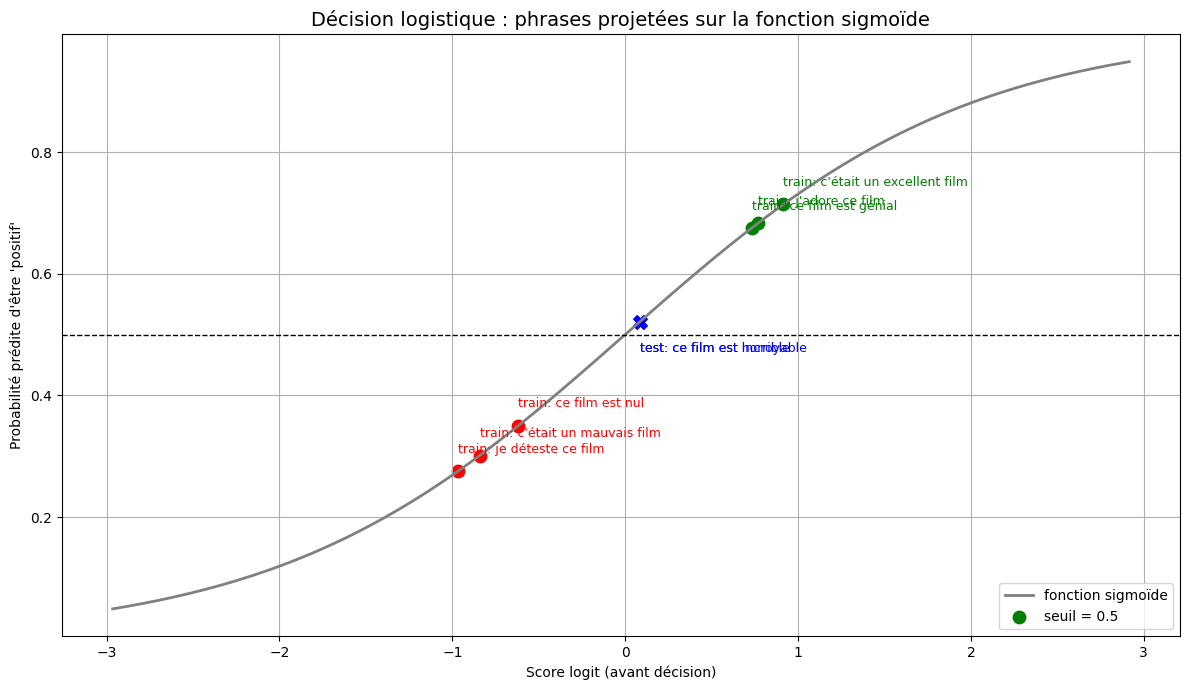

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# ----------------------------
# 1. Corpus d'entraînement
# ----------------------------
avis = [
    "Ce film est génial",
    "J'adore ce film",
    "C'était un excellent film",
    "Ce film est nul",
    "Je déteste ce film",
    "C'était un mauvais film"
]
labels = ["positif", "positif", "positif", "négatif", "négatif", "négatif"]

# Nouvelles phrases à tester
nouveaux_avis = [
    "Ce film est incroyable",   # attendu : positif
    "Ce film est horrible"      # attendu : négatif
]

# ----------------------------
# 2. Prétraitement des textes
# ----------------------------
avis = [a.lower() for a in avis]
nouveaux_avis = [a.lower() for a in nouveaux_avis]

# ----------------------------
# 3. Vectorisation avec n-grammes
# ----------------------------
vectorizer = CountVectorizer(ngram_range=(1, 2))  # capte les mots + paires
X_train = vectorizer.fit_transform(avis)
X_test = vectorizer.transform(nouveaux_avis)

# ----------------------------
# 4. Entraînement du modèle
# ----------------------------
clf = LogisticRegression()
clf.fit(X_train, labels)

# ----------------------------
# 5. Fonction sigmoïde
# ----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ----------------------------
# 6. Obtenir les logits et probabilités
# ----------------------------
logits_train = clf.decision_function(X_train)
logits_test = clf.decision_function(X_test)

probas_train = sigmoid(logits_train)
probas_test = sigmoid(logits_test)

# ----------------------------
# 7. Tracer la fonction sigmoïde
# ----------------------------
x_vals = np.linspace(min(np.concatenate([logits_train, logits_test])) - 2,
                     max(np.concatenate([logits_train, logits_test])) + 2,
                     200)
y_vals = sigmoid(x_vals)

plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, label='fonction sigmoïde', color='gray', linewidth=2)
plt.title("Décision logistique : phrases projetées sur la fonction sigmoïde", fontsize=14)
plt.xlabel("Score logit (avant décision)")
plt.ylabel("Probabilité prédite d'être 'positif'")
plt.grid(True)

# ----------------------------
# 8. Ajouter les phrases d'entraînement
# ----------------------------
for i, phrase in enumerate(avis):
    color = 'green' if labels[i] == "positif" else 'red'
    plt.scatter(logits_train[i], probas_train[i], color=color, s=80)
    plt.text(logits_train[i], probas_train[i] + 0.03, f"train: {phrase}", fontsize=9, color=color)

# ----------------------------
# 9. Ajouter les phrases test
# ----------------------------
for i, phrase in enumerate(nouveaux_avis):
    plt.scatter(logits_test[i], probas_test[i], color='blue', s=90, marker='X')
    plt.text(logits_test[i], probas_test[i] - 0.05, f"test: {phrase}", fontsize=9, color='blue')

# Ligne de seuil de décision
plt.axhline(0.5, color='black', linestyle='--', linewidth=1)
plt.legend(["fonction sigmoïde", "seuil = 0.5"], loc="lower right")
plt.tight_layout()
plt.show()

## 📐 Représentation vectorielle : Exemple TF-IDF


In [ ]:
# Embedding

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

corpus = [
    "Le NLP est fascinant",
    "Le NLP est une branche de l'intelligence artificielle",
    "L'intelligence artificielle est l'avenir"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,artificielle,avenir,branche,de,est,fascinant,intelligence,le,nlp,une
0,0.000000,0.000000,0.000000,0.000000,0.373119,0.631745,0.000000,0.480458,0.480458,0.000000
1,0.319604,0.000000,0.420241,0.420241,0.248201,0.000000,0.319604,0.319604,0.319604,0.420241
2,0.480458,0.631745,0.000000,0.000000,0.373119,0.000000,0.480458,0.000000,0.000000,0.000000


In [ ]:
# Resume

import nltk
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize

# Télécharger les ressources nécessaires
nltk.download('punkt')

# Exemple de texte
texte = """
Le traitement automatique du langage naturel est un domaine passionnant de l’intelligence artificielle.
Il permet aux machines de comprendre, générer et analyser du langage humain.
Les techniques classiques incluent le TF-IDF, qui pèse les mots selon leur importance dans le corpus.
Des modèles plus récents comme BERT ou GPT utilisent des architectures neuronales plus complexes.
Cependant, les méthodes comme TF-IDF restent utiles pour des applications simples ou spécialisées.
"""

# Étape 1 : découper en phrases
phrases = sent_tokenize(texte, language='french')

# Étape 2 : transformer les phrases en vecteurs TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(phrases)

# Étape 3 : calcul du score moyen de chaque phrase
scores = X.mean(axis=1).flatten().tolist()[0]

# Étape 4 : trier les phrases selon leur score
phrases_scored = list(zip(phrases, scores))
phrases_scored.sort(key=lambda x: x[1], reverse=True)

# Étape 5 : générer le résumé (top 2 phrases par exemple)
resume = "\n".join([p[0] for p in phrases_scored[:2]])
print("Résumé généré :\n")
print(resume)


Résumé généré :

Les techniques classiques incluent le TF-IDF, qui pèse les mots selon leur importance dans le corpus.
Cependant, les méthodes comme TF-IDF restent utiles pour des applications simples ou spécialisées.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Classification 1

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Données d'exemple
texts = ["J'adore le NLP", "Je déteste attendre", "Le NLP est intéressant", "Je n'aime pas le bruit"]
labels = ["positif", "négatif", "positif", "négatif"]

# Création et entraînement du modèle
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(texts, labels)

# Exemple de prédiction
nouveau_texte = ["Je trouve le NLP très utile"]
prediction = model.predict(nouveau_texte)

print(f"Prédiction pour '{nouveau_texte[0]}':", prediction[0])

Prédiction pour 'Je trouve le NLP très utile': positif


In [ ]:
# Classification 2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Corpus
docs = [
    "Le match de football a été intense",
    "Le joueur a marqué trois buts",
    "L'équipe a gagné la coupe du monde",
    "Le président a fait un discours important",
    "Le gouvernement prépare une réforme",
    "Le parlement a adopté une nouvelle loi"
]

# Étiquettes
labels = ["sport", "sport", "sport", "politique", "politique", "politique"]

# Split en entraînement/test
X_train, X_test, y_train, y_test = train_test_split(docs, labels, test_size=0.3, random_state=41)

# Pipeline : TF-IDF + Classifieur
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression())
])

# Entraînement
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation
print("X_test", X_test)
print("y_pred", y_pred)
print("y_test", y_test)
print(classification_report(y_test, y_pred))


X_test ['Le joueur a marqué trois buts', 'Le gouvernement prépare une réforme']
y_pred ['politique' 'politique']
y_test ['sport', 'politique']
              precision    recall  f1-score   support

   politique       0.50      1.00      0.67         1
       sport       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Exemple avec limite claire

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Deux phrases avec les mêmes mots mais sens opposé
X_train = [
    "J'adore ce film",    # positif
    "J'aime pas ce film",    # négatif
]


X_test = [
    "J'aime ce film",    # positif
    "J'adore pas ce film"
]


y_train = ["positif", "négatif"]


# TF-IDF vectorisation
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(X_train)
X_tfidf_test = vectorizer.transform(X_test)


# Entraînement d’un classifieur simple
clf = LogisticRegression()
clf.fit(X_tfidf_train, y_train)

# Test sur les mêmes phrases
y_pred = clf.predict(X_tfidf_test)

# Affichage des résultats
for phrase, pred in zip(X_test, y_pred):
    print(f"Texte : {phrase}")
    print(f"Prédiction : {pred}")
    print("---")

Texte : J'aime ce film
Prédiction : négatif
---
Texte : J'adore pas ce film
Prédiction : positif
---


In [ ]:
# Calcul de similtude pour mieux comprendre

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calcul de la similarité cosinus entre test et train
similarities = cosine_similarity(X_tfidf_test, X_tfidf_train)

# Affichage
for i, test_phrase in enumerate(X_test):
    print(f"Test : {test_phrase}")
    for j, train_phrase in enumerate(X_train):
        print(f" ↳ Similaire à : {train_phrase} → score = {similarities[i, j]:.2f}")
    print("---")

Test : J'aime ce film
 ↳ Similaire à : J'adore ce film → score = 0.50
 ↳ Similaire à : J'aime pas ce film → score = 0.82
---
Test : J'adore pas ce film
 ↳ Similaire à : J'adore ce film → score = 0.82
 ↳ Similaire à : J'aime pas ce film → score = 0.67
---


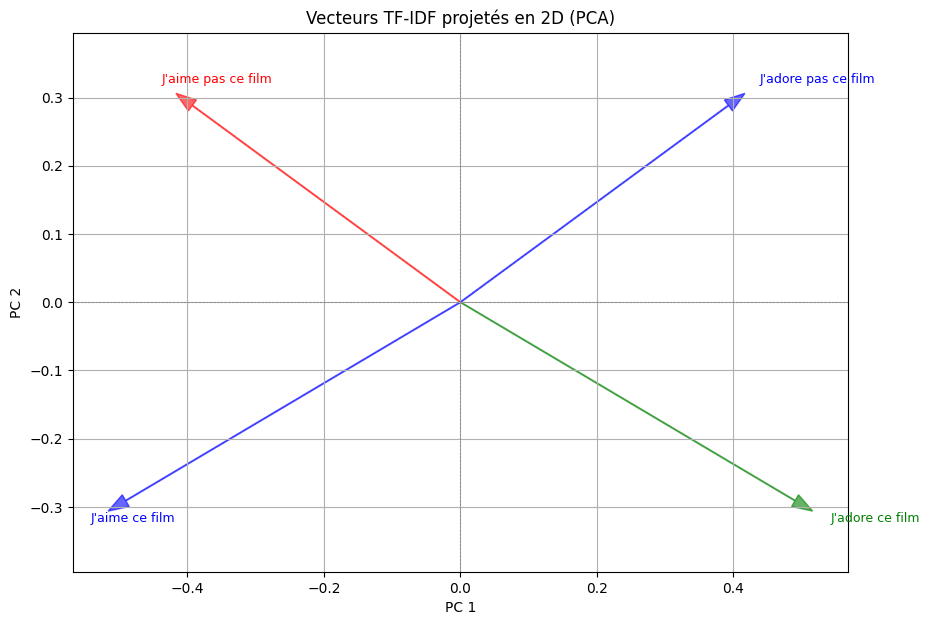

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Données
X_train = [
    "J'adore ce film",        # positif
    "J'aime pas ce film"      # négatif
]

X_test = [
    "J'aime ce film",         # ambigu
    "J'adore pas ce film"     # ambigu
]

# Fusion des données pour traitement et visualisation
phrases = X_train + X_test
colors = ['green', 'red', 'blue', 'blue']  # vert/rouge pour train, bleu pour test

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(phrases).toarray()

# Réduction en 2D avec PCA
X_2d = PCA(n_components=2).fit_transform(X_tfidf)

# Tracé
plt.figure(figsize=(10, 7))
origin = np.zeros((len(X_2d), 2))

for i in range(len(phrases)):
    plt.arrow(0, 0, X_2d[i, 0], X_2d[i, 1],
              color=colors[i], alpha=0.6,
              head_width=0.02, length_includes_head=True)
    plt.text(X_2d[i, 0]*1.05, X_2d[i, 1]*1.05,
             phrases[i], fontsize=9, color=colors[i])

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.title("Vecteurs TF-IDF projetés en 2D (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.axis('equal')
plt.show() 

## 📐 Représentation vectorielle : Embedding (Word2Vec)

In [ ]:
!pip install --upgrade --force-reinstall numpy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp

In [ ]:
from gensim.models import Word2Vec

# Corpus simple (chaque phrase est une liste de mots)
corpus = [
    ["ce", "film", "est", "génial"],
    ["je", "déteste", "ce", "film"],
    ["c'était", "un", "film", "magnifique"],
    ["ce", "film", "est", "nul"],
    ["ce", "film", "était", "incroyable"]
]

# Entraînement du modèle
model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)  # sg=1 → skip-gram

# Exemple : obtenir le vecteur du mot "film"
print("Vecteur de 'film' :", model.wv["film"])

# Trouver les mots proches
print("Mots proches de 'film' :", model.wv.most_similar("film"))

Vecteur de 'film' : [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]
Mots proches de 'film' : [('génial', 0.16704076528549194), ('un', 0.13204392790794373), ('est', 0.1267007291316986), ('déteste', 0.0998455286026001), ('ce', 0.042373016476631165), ('nul', 0.012442179024219513), ('je'

In [ ]:
#Utilisation d'un modele pre-entraine
!wget -O cc.fr.300.vec.gz https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.vec.gz

--2025-03-22 22:35:49--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.33.183.115, 13.33.183.33, 13.33.183.29, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.33.183.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1287757366 (1.2G) [binary/octet-stream]
Saving to: ‘cc.fr.300.vec.gz’

cc.fr.300.vec.gz    100%[===================>]   1.20G  22.8MB/s    in 54s     

2025-03-22 22:36:44 (22.7 MB/s) - ‘cc.fr.300.vec.gz’ saved [1287757366/1287757366]



In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('cc.fr.300.vec.gz', binary=False)

model.similarity("chat", "chien")

0.72753644

In [ ]:
model.most_similar("roi")

[('Roi', 0.843011200428009),
 ('monarque', 0.7603071331977844),
 ('souverain', 0.724419891834259),
 ('royaume', 0.7038922309875488),
 ('prince', 0.7036827206611633),
 ('rois', 0.6541060209274292),
 ('reine', 0.6316980719566345),
 ('duc', 0.6201280355453491),
 ('roi.', 0.612676739692688),
 ('roy', 0.6117520928382874)]

In [ ]:
# Autre Exemple

from gensim.downloader import load

# Cela télécharge automatiquement le modèle GoogleNews-vectors-negative300 (~1.6 GB)
model = load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
result = model.most_similar(positive=["king", "woman"], negative=["man"], topn=1)
print("king - man + woman ≈", result[0][0])

king - man + woman ≈ queen


# ✅ Outil utilisé : pytesseract + Pillow + image upload



In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,894 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract
from PIL import Image
from google.colab import files

In [ ]:
uploaded = files.upload()
# Par exemple : image nommée 'ocr_test.png'

Saving test_nlp.png to test_nlp.png


In [ ]:
# Ouvre l'image
image = Image.open('test_nlp.png')

# Applique OCR avec pytesseract
text = pytesseract.image_to_string(image)

# Affiche le texte détecté
print("Texte détecté dans l'image :\n")
print(text)

Texte détecté dans l'image :

Table of Contents

 

Hi

SHS BRBOORREeof

Vue D’ensemble

Introduction au NLP

Prétraitement de Texte

Représentation vectorielle du texte
Embeddings contextuels

Mesure et Distance

Modéles avancés : Transformers

Lien entre Transformers, BERT et GPT
Modéles classiques en NLP

Transformer et modéles de langage avancés
Evaluation des modéles NLP
Implémentation pratique

Reconnaissance Optique de Caractéres (OCR)
Projets pratiques en classe

